## First results for Resampling Effect in uCT

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import PIL.ImageOps
%matplotlib inline

pathToSavingFiles = '/Users/nenetto/Trabajo/JHU-uCT/ShowTime/2015_11_16_Meeting'

In [11]:
simData = pd.read_csv('/Users/nenetto/Trabajo/JHU-uCT/ShowTime/2015_11_16_Meeting/MetricsVsRoISize/TotalMetricDiffData.csv')
# Delete unused columns
simData = simData.drop(simData.columns[[list([0,3,4,5,7,8]) + range(14,46,1) + range(48,130,1)]], axis=1)

for i, varName in enumerate(simData.columns.values):
    print i, varName
    


0 ImageName
1 RoIName
2 RoISizeX
3 RoIVolume
4 RoINumber
5 Algorithm
6 Transf
7 GoldStandard
8 ConnectivityConnectivity
9 ConnectivityConnectivityDensity
10 SMIConcave
11 SMIPlus
12 SMIMinus
13 SMI
14 ThicknessTbThMean
15 ThicknessTbThStdDev
16 ThicknessTbThMax
17 ThicknessTbSpMean
18 ThicknessTbThStdDev.1
19 ThicknessTbThMax.1
20 VolumeFractionSurfaceBV
21 VolumeFractionSurfaceTV
22 VolumeFractionSurfaceVolumeFraction
23 VolumeFractionVoxelBV
24 VolumeFractionVoxelTV
25 VolumeFractionVoxelVolumeFraction


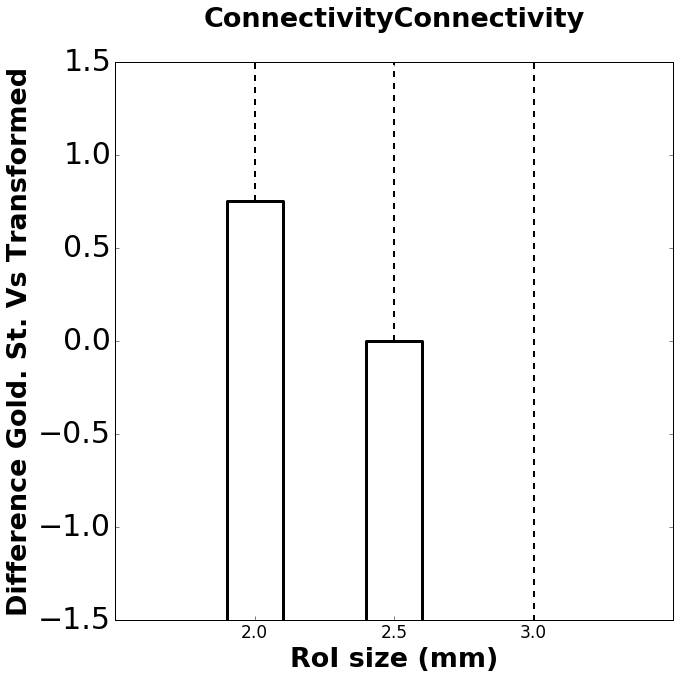

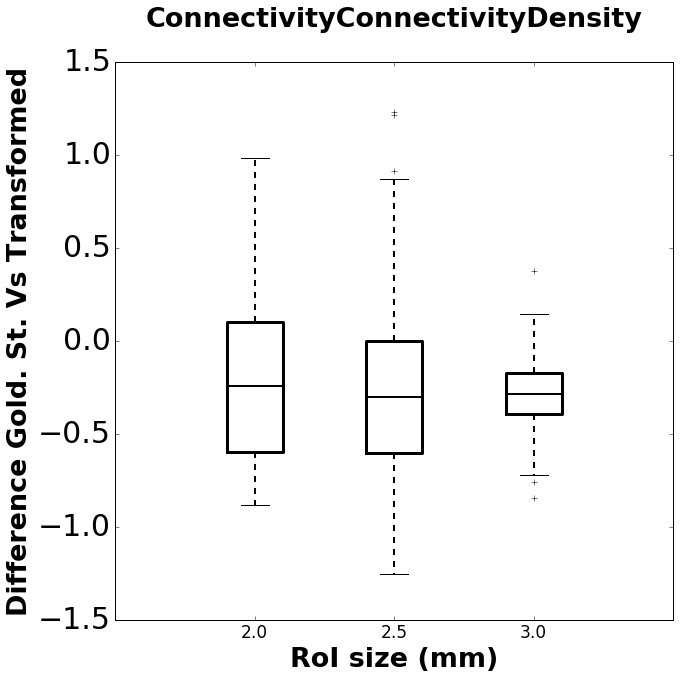

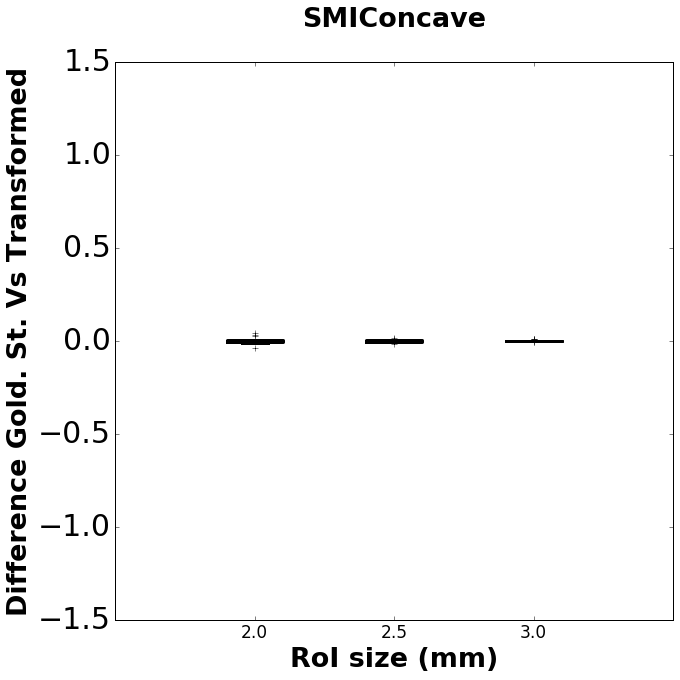

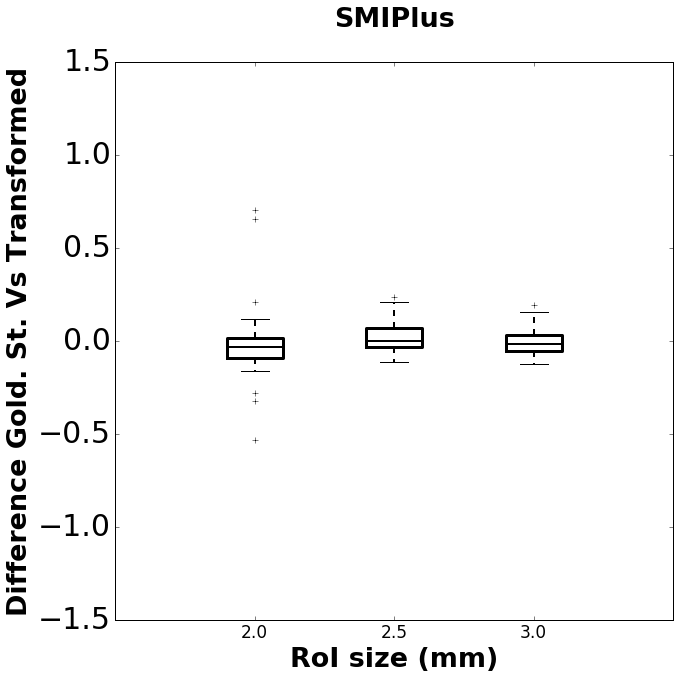

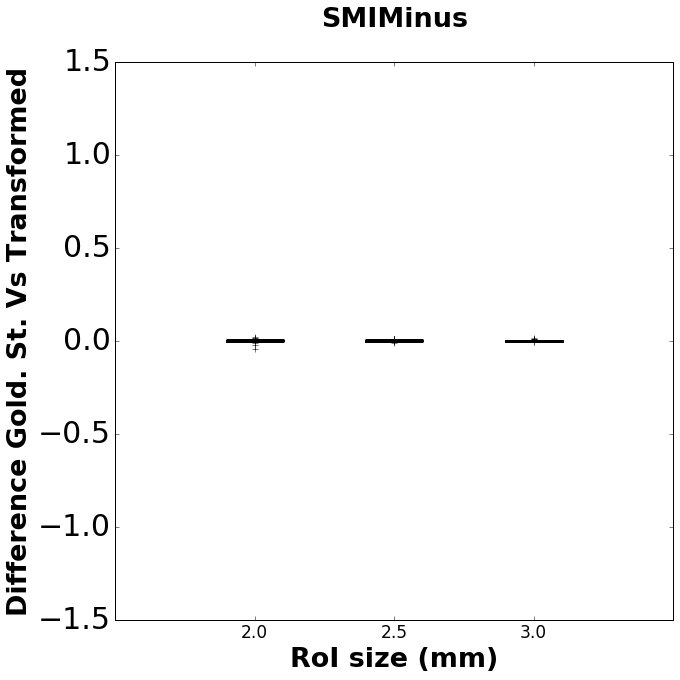

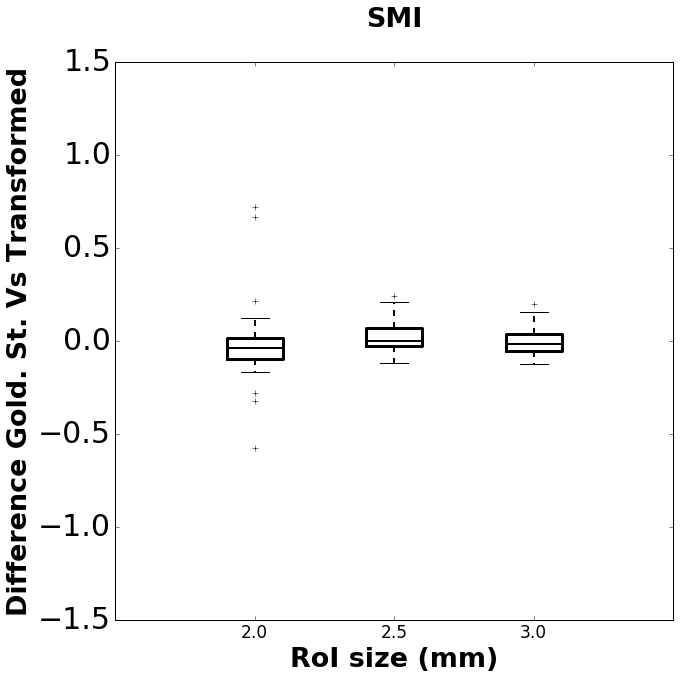

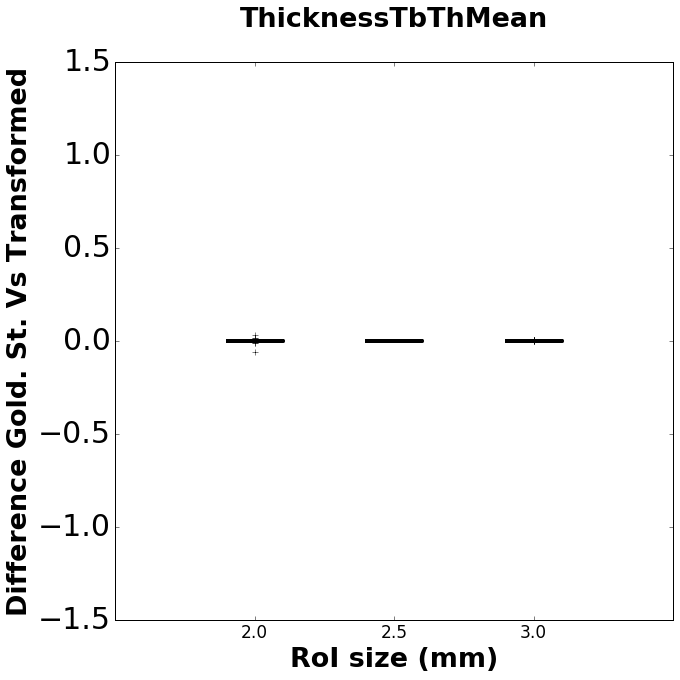

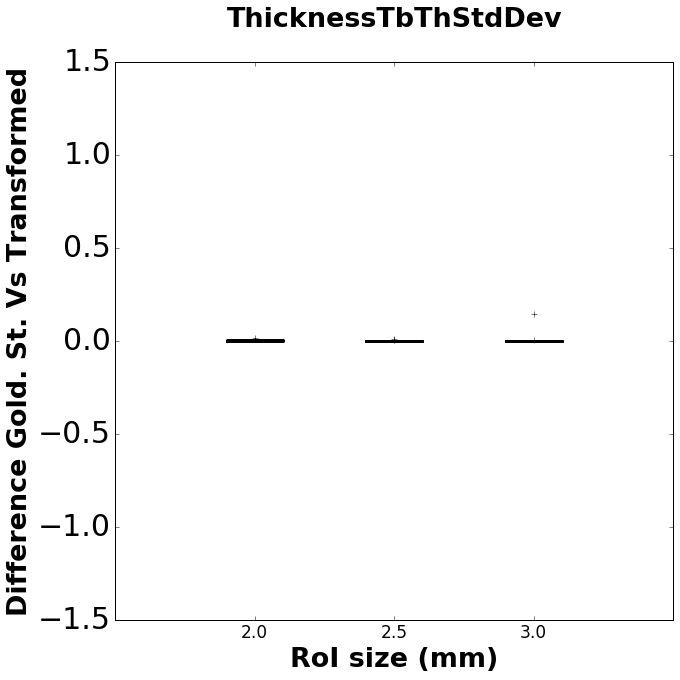

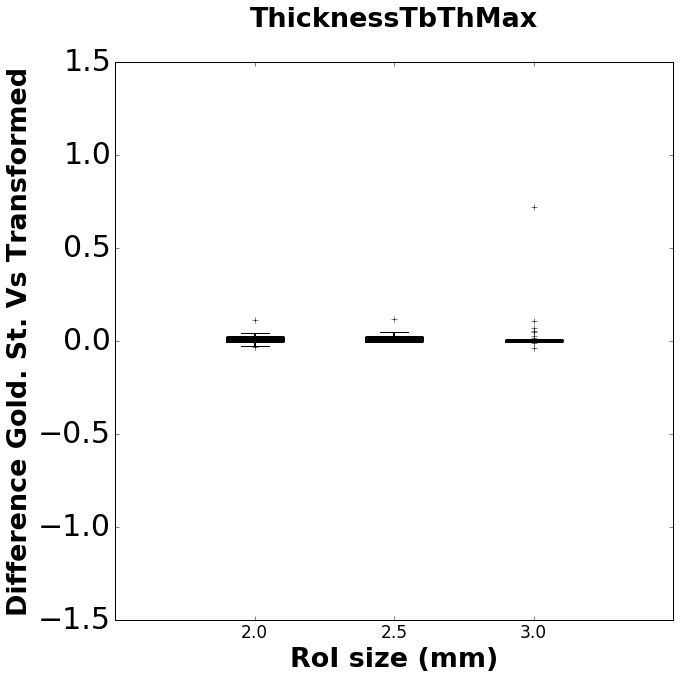

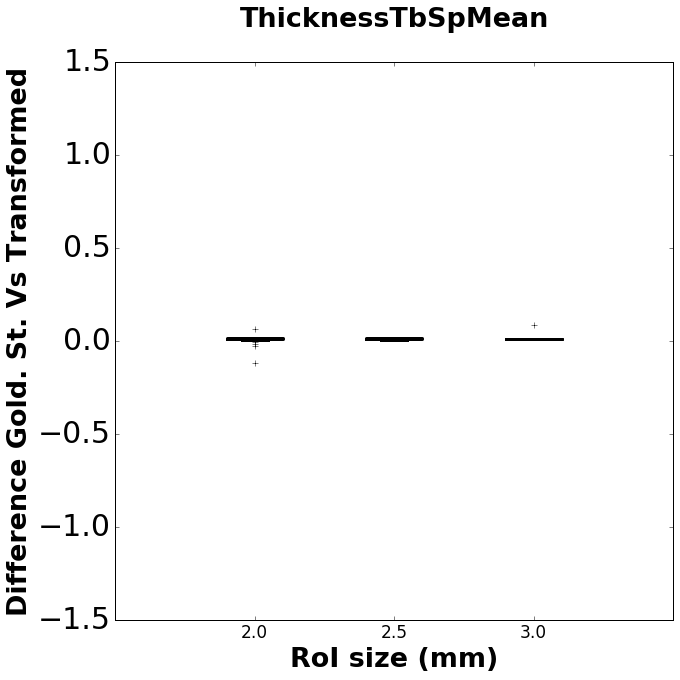

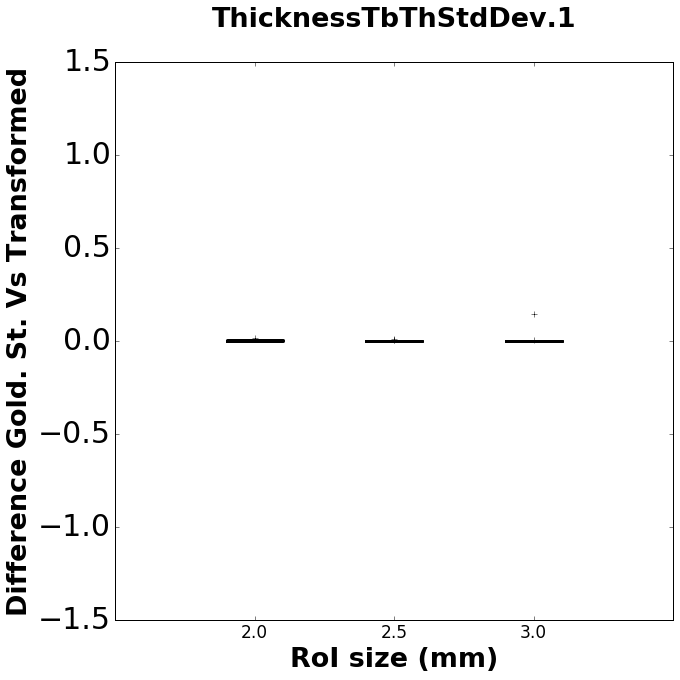

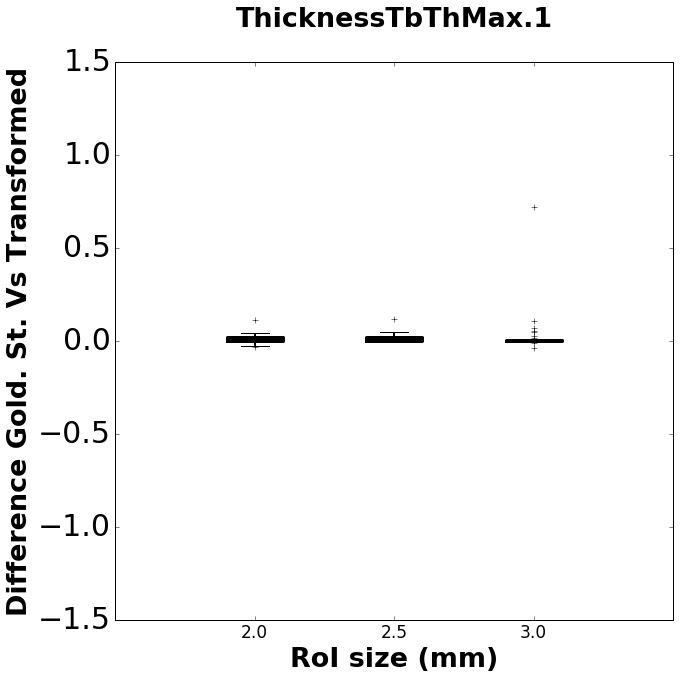

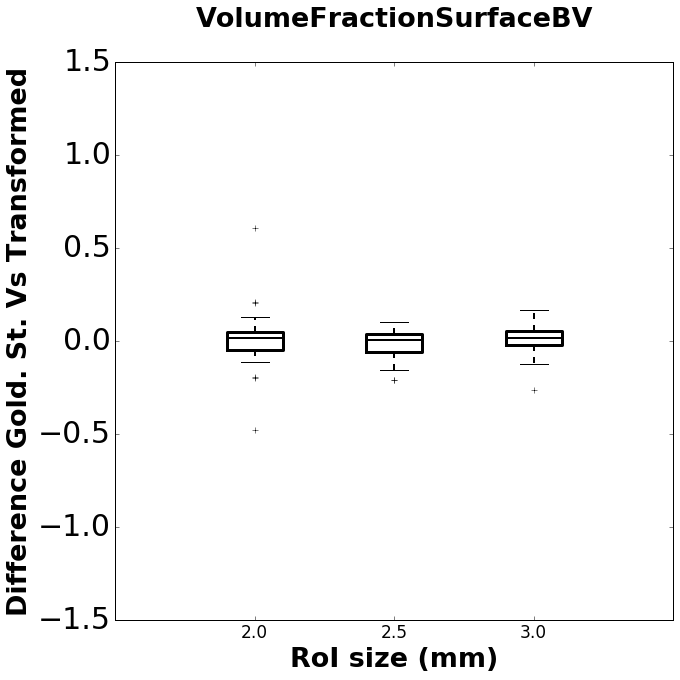

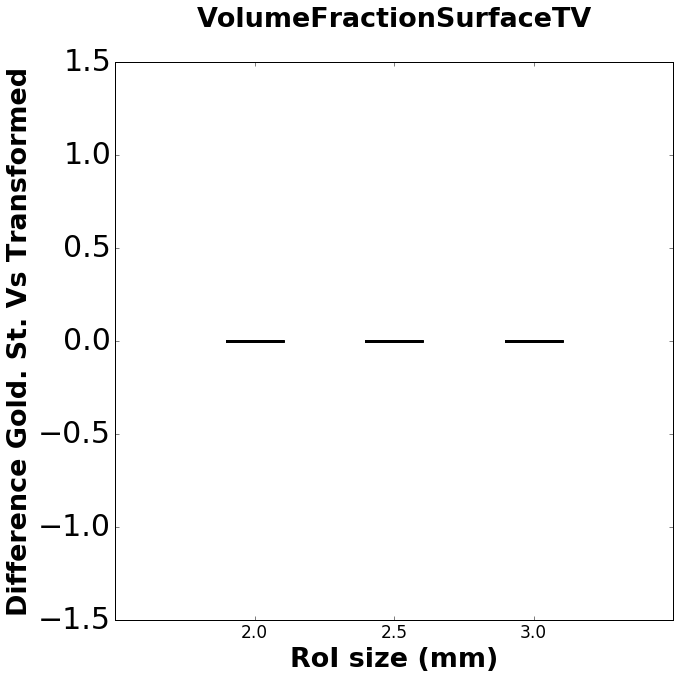

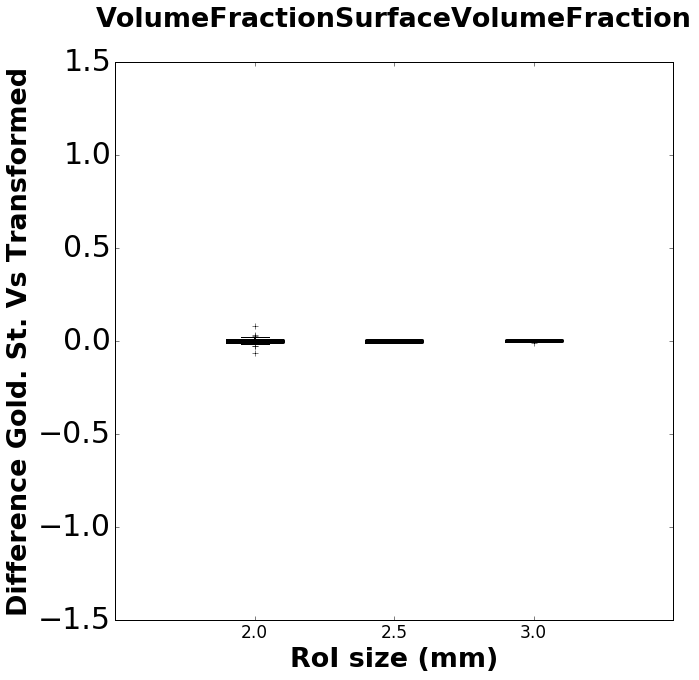

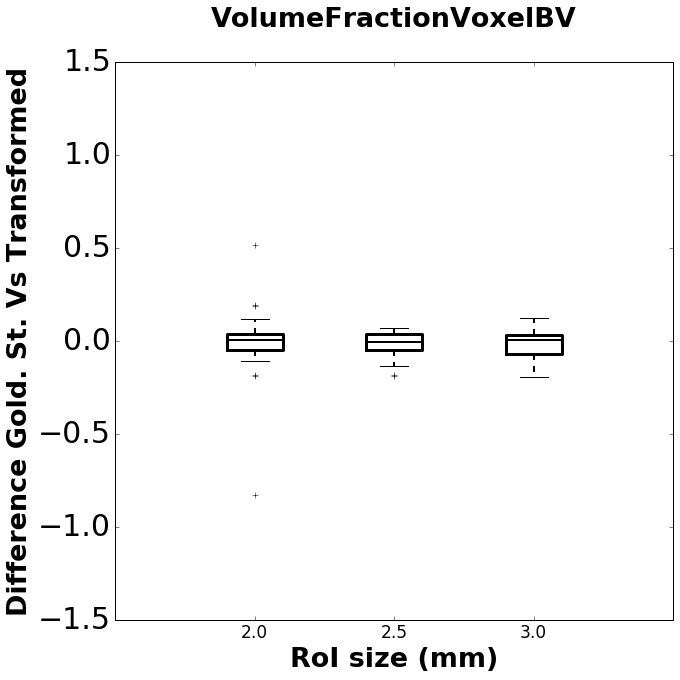

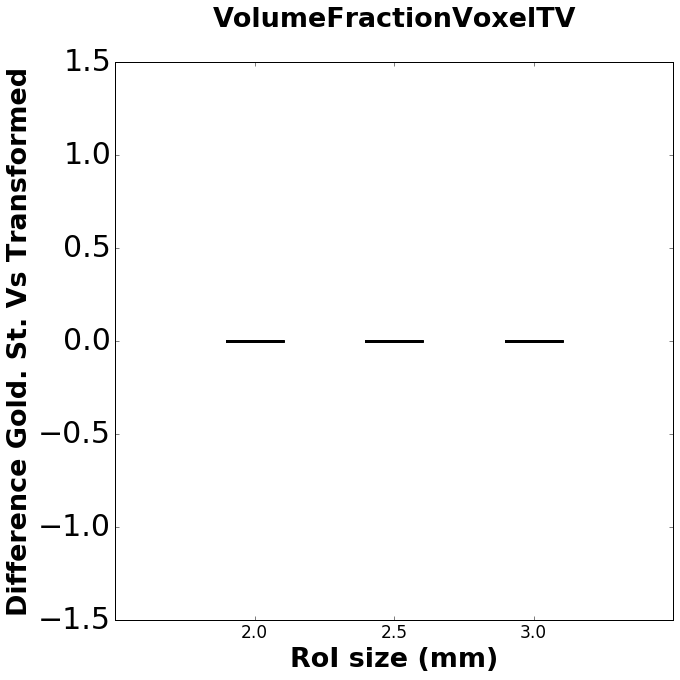

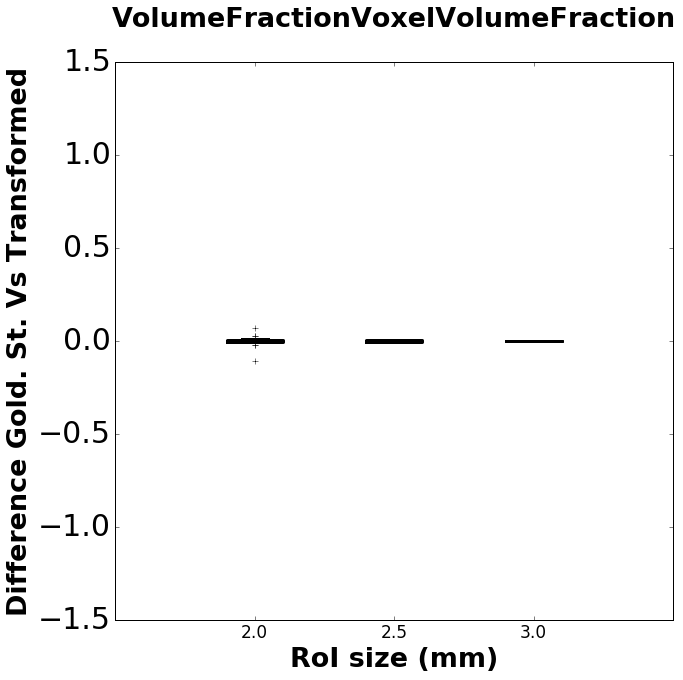

In [12]:
sizeFont = 40
WidthBox = 0.2
color = 'black'
varNum = range(8,26,1) # Variables to show in the graph
plt.gcf().subplots_adjust(bottom=0.15)

for var in varNum:
    f, ax = plt.subplots(1, sharex=True, figsize = (10,10)) 
    varName = simData.columns.values[var]
    roiSizeList = simData['RoISizeX'].unique()
    for roiSize in roiSizeList:
        bp = ax.boxplot(simData[simData['RoISizeX'] == roiSize][varName].values,\
                        positions = [roiSize],\
                        widths = [WidthBox])
        ax.set_xlim([1.5,3.5])
        ax.set_ylim([-1.5,1.5])
        plt.setp(bp['boxes'], color=color, lw = 3)
        plt.setp(bp['whiskers'], color=color, lw = 2)
        plt.setp(bp['medians'], color = color, lw = 2)
        plt.setp(bp['fliers'], color=color, marker='+')
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=30)
        ax.set_xlabel('RoI size (mm)', fontsize=27,fontweight="bold")
        ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
        ax.set_xticks(np.array(roiSizeList))
        ax.set_xticklabels(roiSizeList, fontsize=17)
        ax.set_title(varName + '\n', fontsize=27,fontweight="bold")
    
    # Save results
    resultfile = pathToSavingFiles + '/MetricsVsRoISize/' +varName+'.png'
    plt.savefig(resultfile,bbox_inches='tight')
    image = Image.open(resultfile)
    if image.mode == 'RGBA':
        r,g,b,a = image.split()
        rgb_image = Image.merge('RGB', (r,g,b))

        inverted_image = PIL.ImageOps.invert(rgb_image)

        r2,g2,b2 = inverted_image.split()

        final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

        final_transparent_image.save(resultfile)

    else:
        inverted_image = PIL.ImageOps.invert(image)
        inverted_image.save(resultfile)
    


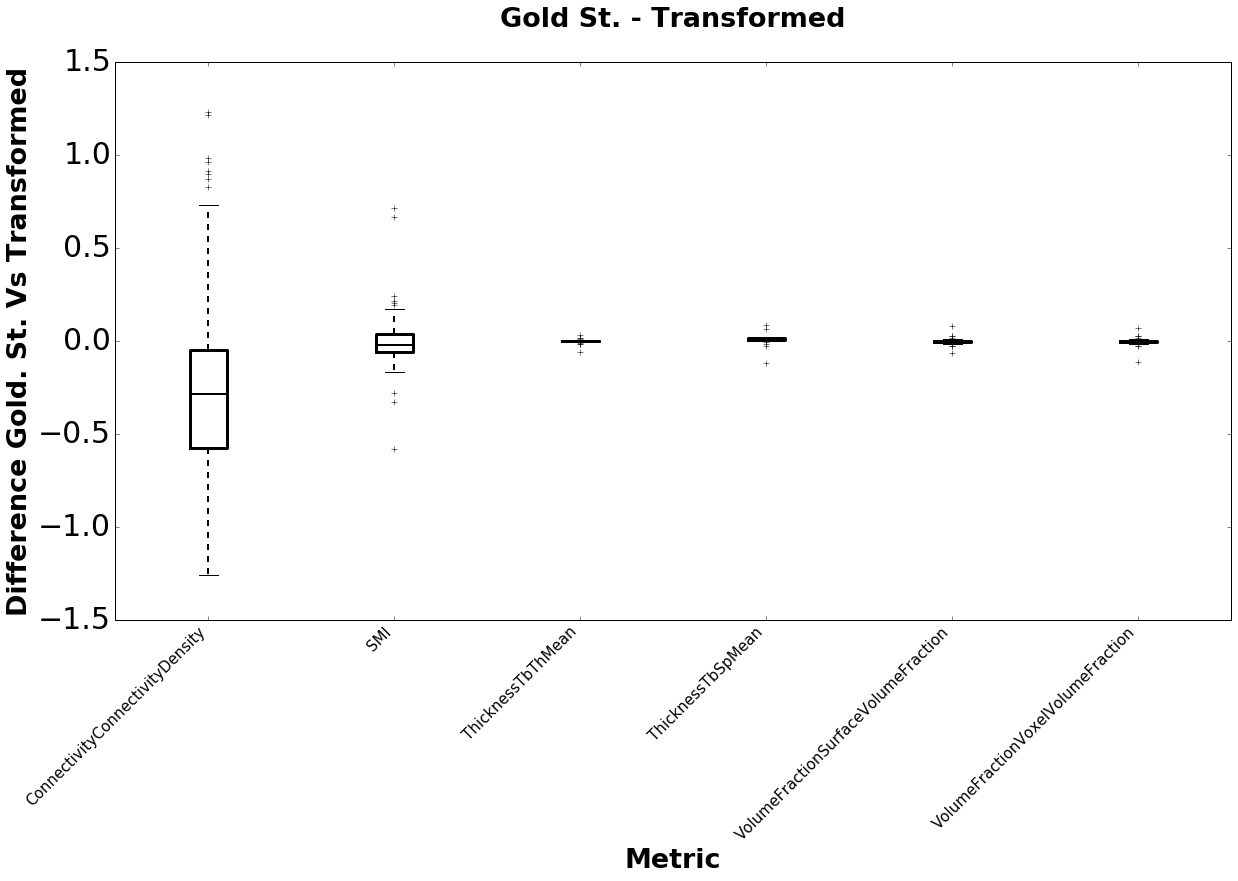

In [13]:
sizeFont = 40
WidthBox = 0.2
color = 'black'
plt.gcf().subplots_adjust(bottom=0.15)

f, ax = plt.subplots(1, sharex=True, figsize = (20,10))
varNames = simData.columns.values[[9,13,14,17,22,25]]

for i, varName in enumerate(varNames):
    bp = ax.boxplot(simData[varName].values,\
                        positions = [i],\
                        widths = [WidthBox])
    ax.set_xlim([-0.5,i+0.5])
    ax.set_ylim([-1.5,1.5])
    plt.setp(bp['boxes'], color=color, lw = 3)
    plt.setp(bp['whiskers'], color=color, lw = 2)
    plt.setp(bp['medians'], color = color, lw = 2)
    plt.setp(bp['fliers'], color=color, marker='+')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('Metric', fontsize=27,fontweight="bold")
    ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
    ax.set_xticks(range(len(varNames)))
    ax.set_xticklabels(varNames, fontsize=15, rotation=45, ha='right')
    ax.set_title('Gold St. - Transformed' + '\n', fontsize=27,fontweight="bold")


    
# Save results
resultfile = pathToSavingFiles + '/MetricsVsRoISize/AllTogether.png'
plt.savefig(resultfile,bbox_inches='tight')
image = Image.open(resultfile)
if image.mode == 'RGBA':
    r,g,b,a = image.split()
    rgb_image = Image.merge('RGB', (r,g,b))

    inverted_image = PIL.ImageOps.invert(rgb_image)

    r2,g2,b2 = inverted_image.split()

    final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

    final_transparent_image.save(resultfile)

else:
    inverted_image = PIL.ImageOps.invert(image)
    inverted_image.save(resultfile)

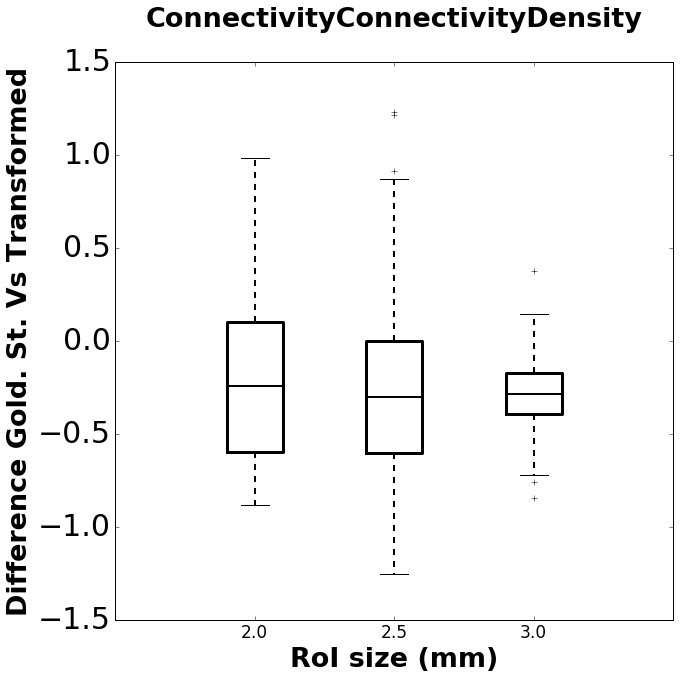

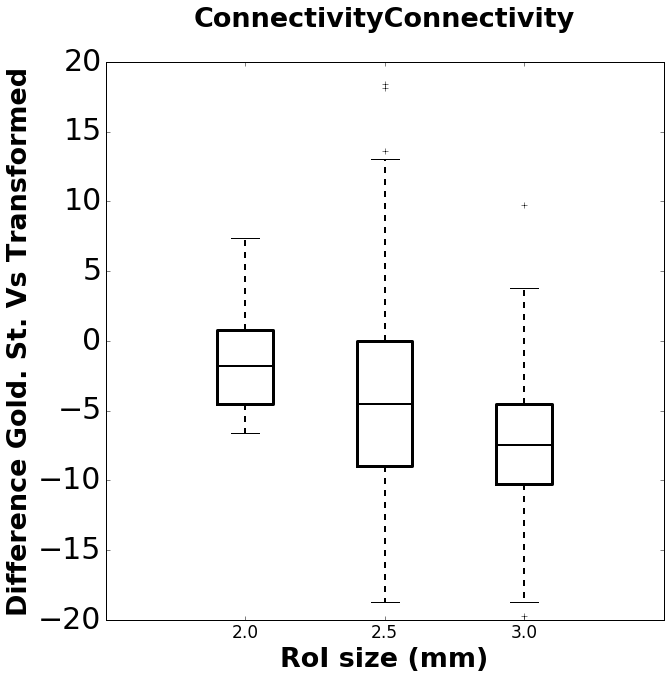

In [14]:
f, ax = plt.subplots(1, sharex=True, figsize = (10,10)) 
varName = 'ConnectivityConnectivityDensity'
roiSizeList = simData['RoISizeX'].unique()
for roiSize in roiSizeList:
    bp = ax.boxplot(simData[simData['RoISizeX'] == roiSize][varName].values,\
                    positions = [roiSize],\
                    widths = [WidthBox])
    ax.set_xlim([1.5,3.5])
    ax.set_ylim([-1.5,1.5])
    plt.setp(bp['boxes'], color=color, lw = 3)
    plt.setp(bp['whiskers'], color=color, lw = 2)
    plt.setp(bp['medians'], color = color, lw = 2)
    plt.setp(bp['fliers'], color=color, marker='+')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('RoI size (mm)', fontsize=27,fontweight="bold")
    ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
    ax.set_xticks(np.array(roiSizeList))
    ax.set_xticklabels(roiSizeList, fontsize=17)
    ax.set_title(varName + '\n', fontsize=27,fontweight="bold")
    
# Save results
resultfile = pathToSavingFiles + '/MetricsVsRoISize/ConnectivityDensityExtra.png'
plt.savefig(resultfile,bbox_inches='tight')
image = Image.open(resultfile)
if image.mode == 'RGBA':
    r,g,b,a = image.split()
    rgb_image = Image.merge('RGB', (r,g,b))

    inverted_image = PIL.ImageOps.invert(rgb_image)

    r2,g2,b2 = inverted_image.split()

    final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

    final_transparent_image.save(resultfile)

else:
    inverted_image = PIL.ImageOps.invert(image)
    inverted_image.save(resultfile)    
    
    
f, ax = plt.subplots(1, sharex=True, figsize = (10,10)) 
varName = 'ConnectivityConnectivity'
roiSizeList = simData['RoISizeX'].unique()
for roiSize in roiSizeList:
    bp = ax.boxplot(simData[simData['RoISizeX'] == roiSize][varName].values,\
                    positions = [roiSize],\
                    widths = [WidthBox])
    ax.set_xlim([1.5,3.5])
    ax.set_ylim([-20,20])
    plt.setp(bp['boxes'], color=color, lw = 3)
    plt.setp(bp['whiskers'], color=color, lw = 2)
    plt.setp(bp['medians'], color = color, lw = 2)
    plt.setp(bp['fliers'], color=color, marker='+')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('RoI size (mm)', fontsize=27,fontweight="bold")
    ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
    ax.set_xticks(np.array(roiSizeList))
    ax.set_xticklabels(roiSizeList, fontsize=17)
    ax.set_title(varName + '\n', fontsize=27,fontweight="bold")
    
# Save results
resultfile = pathToSavingFiles + '/MetricsVsRoISize/ConnectivityExtra.png'
plt.savefig(resultfile,bbox_inches='tight')
image = Image.open(resultfile)
if image.mode == 'RGBA':
    r,g,b,a = image.split()
    rgb_image = Image.merge('RGB', (r,g,b))

    inverted_image = PIL.ImageOps.invert(rgb_image)

    r2,g2,b2 = inverted_image.split()

    final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

    final_transparent_image.save(resultfile)

else:
    inverted_image = PIL.ImageOps.invert(image)
    inverted_image.save(resultfile)

# uCT Vs CBCT

In [15]:
dirResults = '/Volumes/MARINETTO/Results'


datalist = list()
for f in os.listdir(dirResults):
    newData = pd.read_csv(os.path.join(dirResults,f))
    datalist.append(newData)
    
    
datamatrix = datalist[0]
for i in range(1,len(datalist)):
    datamatrix = pd.concat([datamatrix, datalist[i]])
    
for i, varName in enumerate(datamatrix.columns.values):
    print i, varName
    

0 Unnamed: 0
1 ANISOTROPY_MaxSpheres
2 ANISOTROPY_MinSpheres
3 ANISOTROPY_Radius
4 ANISOTROPY_Tol
5 ANISOTROPY_VectorSampling
6 ANISOTROPY_Vectors
7 Alternative Degree Of Anisotropy
8 Bone Volume mm3 Surface
9 Bone Volume mm3 Voxel
10 Connectivity
11 Connetivity Density
12 Degree Of Anisotropy
13 Dice
14 Diff Alternative Degree Of Anisotropy
15 Diff Bone Volume mm3 Surface
16 Diff Bone Volume mm3 Voxel
17 Diff Connectivity
18 Diff Connetivity Density
19 Diff Degree Of Anisotropy
20 Diff Euler Characteristic
21 Diff Euler Characteristic Delta
22 Diff SMI
23 Diff SMI +
24 Diff SMI -
25 Diff Trabecular Spacing Max
26 Diff Trabecular Spacing Mean
27 Diff Trabecular Spacing Std
28 Diff Trabecular Thickness Max
29 Diff Trabecular Thickness Mean
30 Diff Trabecular Thickness Std
31 Diff Travecular Volumemm3 Surface
32 Diff Travecular Volumemm3 Voxel
33 Diff Volume Fraction Surface
34 Diff Volume Fraction Voxel
35 Euler Characteristic
36 Euler Characteristic Delta
37 Jaccard
38 Matching
39 Numb

In [31]:
# Add columns for Roi size, RoI Number and Gold Standar
datamatrix['RoI Size'] = 0.0
datamatrix['RoI Number'] = 0
datamatrix['Image Origin'] = 'uCT'
for i, varName in enumerate(datamatrix.columns.values):
    print i, varName

0 Unnamed: 0
1 ANISOTROPY_MaxSpheres
2 ANISOTROPY_MinSpheres
3 ANISOTROPY_Radius
4 ANISOTROPY_Tol
5 ANISOTROPY_VectorSampling
6 ANISOTROPY_Vectors
7 Alternative Degree Of Anisotropy
8 Bone Volume mm3 Surface
9 Bone Volume mm3 Voxel
10 Connectivity
11 Connetivity Density
12 Degree Of Anisotropy
13 Dice
14 Diff Alternative Degree Of Anisotropy
15 Diff Bone Volume mm3 Surface
16 Diff Bone Volume mm3 Voxel
17 Diff Connectivity
18 Diff Connetivity Density
19 Diff Degree Of Anisotropy
20 Diff Euler Characteristic
21 Diff Euler Characteristic Delta
22 Diff SMI
23 Diff SMI +
24 Diff SMI -
25 Diff Trabecular Spacing Max
26 Diff Trabecular Spacing Mean
27 Diff Trabecular Spacing Std
28 Diff Trabecular Thickness Max
29 Diff Trabecular Thickness Mean
30 Diff Trabecular Thickness Std
31 Diff Travecular Volumemm3 Surface
32 Diff Travecular Volumemm3 Voxel
33 Diff Volume Fraction Surface
34 Diff Volume Fraction Voxel
35 Euler Characteristic
36 Euler Characteristic Delta
37 Jaccard
38 Matching
39 Numb

In [32]:
for i in range(len(datamatrix.index)):
    imageName = datamatrix.iloc[i]['Segmented File'].split('\\')[-1]
    ImageOrigin = imageName.split('_')[0]
    RoISize = float(imageName.split('_')[1][:-2])
    RoINumber = int(imageName.split('_')[2][3:])
    #print ImageOrigin, RoISize, RoINumber
    
    datamatrix.iat[i,68] = ImageOrigin
    datamatrix.iat[i,67] = RoINumber
    datamatrix.iat[i,66] = RoISize

print datamatrix.iat[i,66], RoISize

4.8 4.8


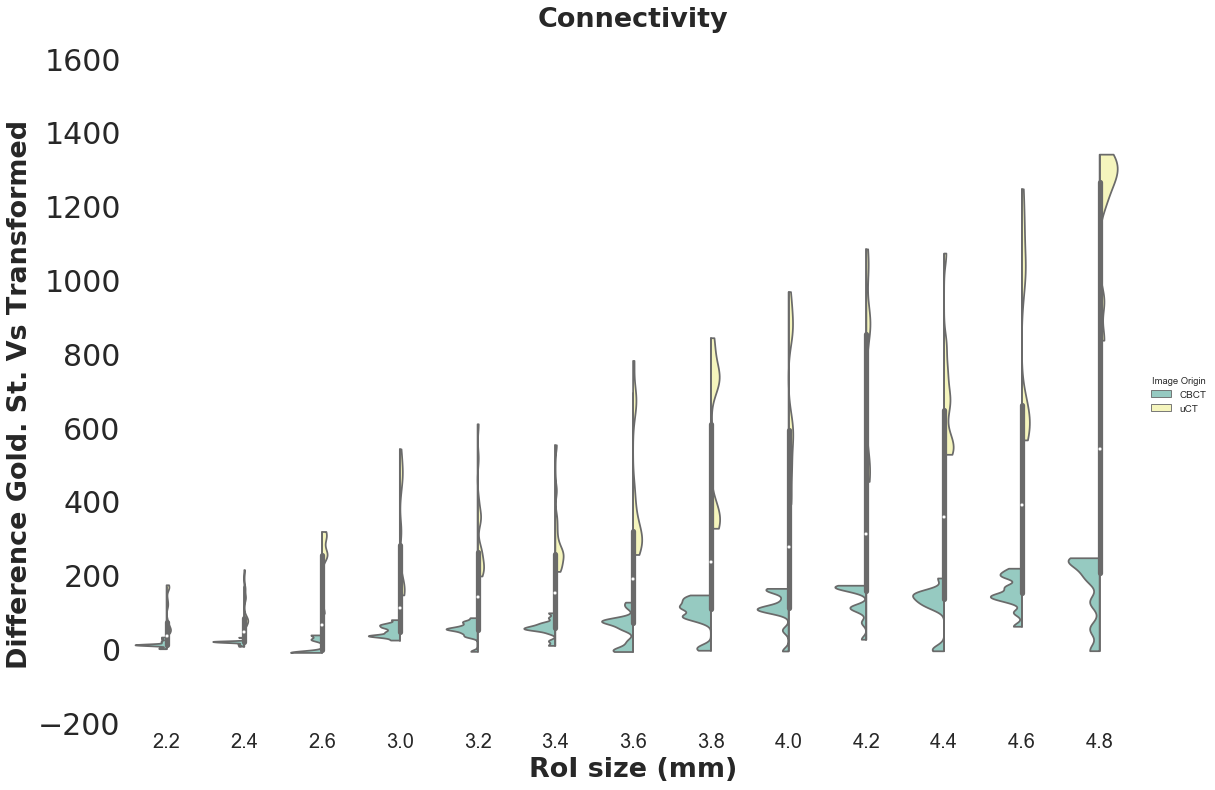

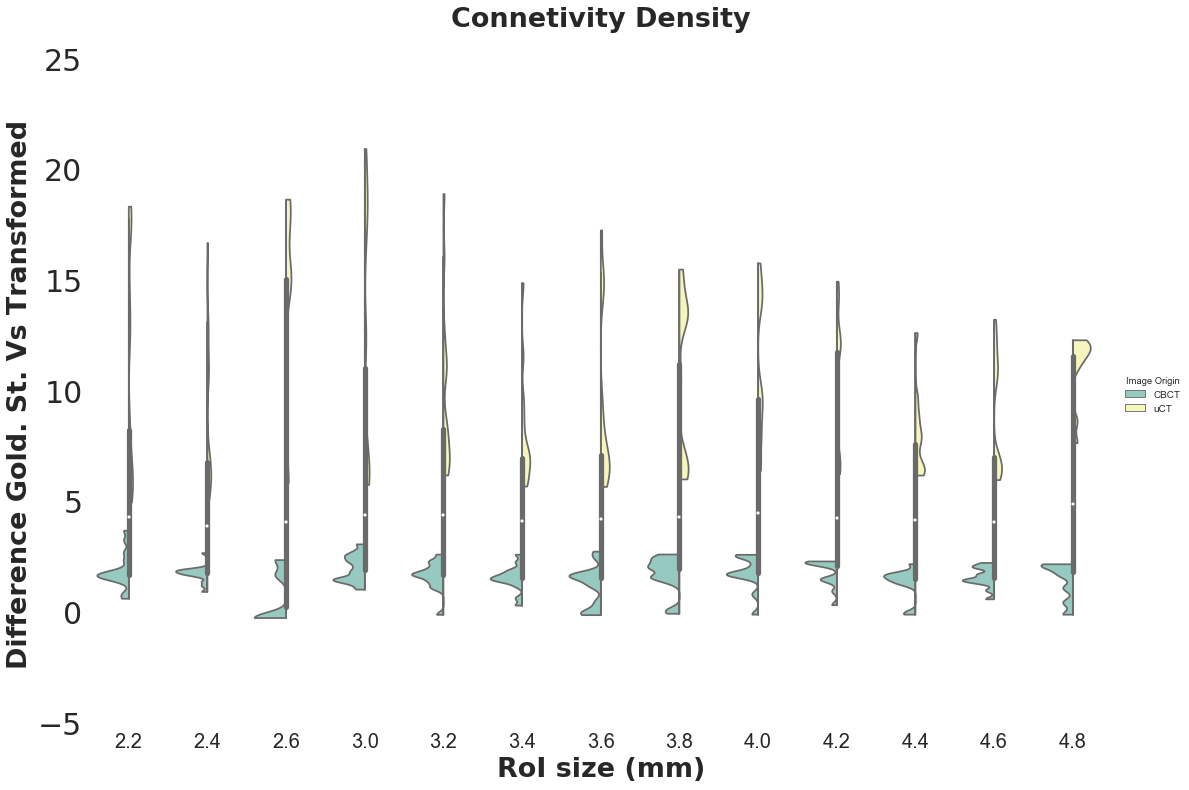

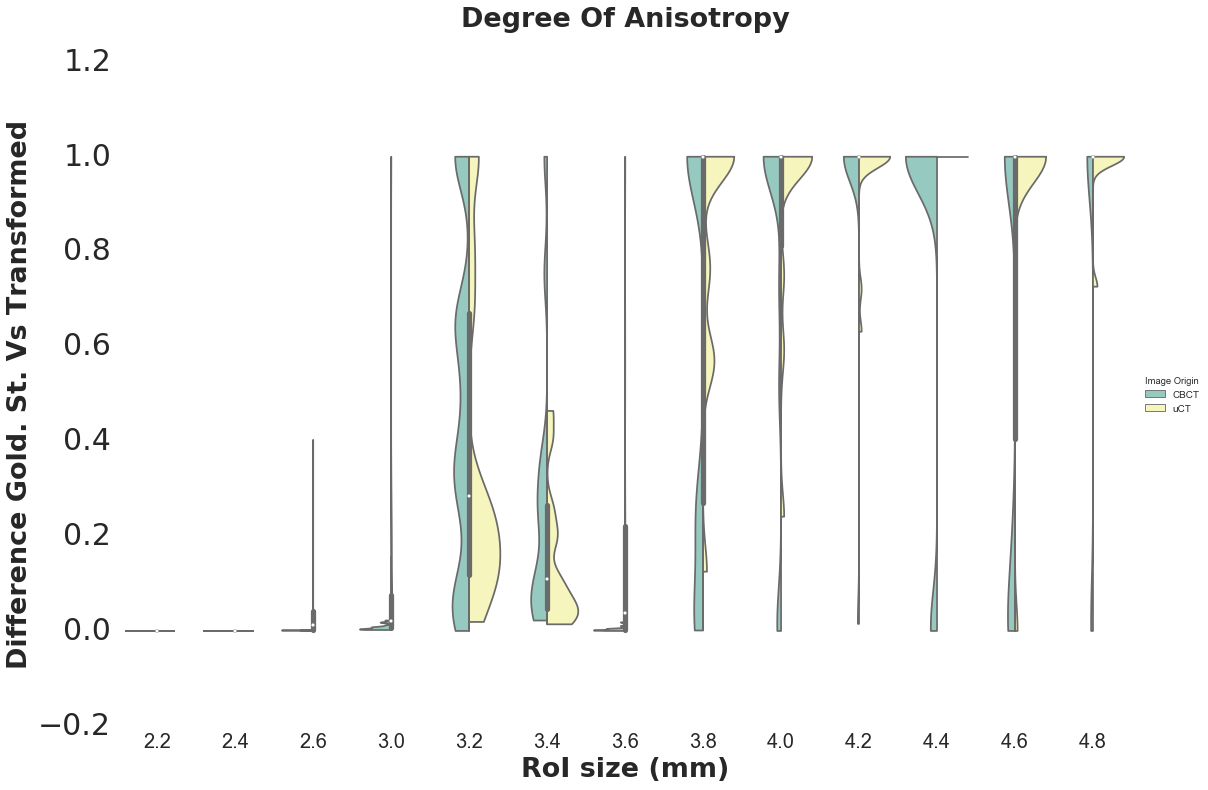

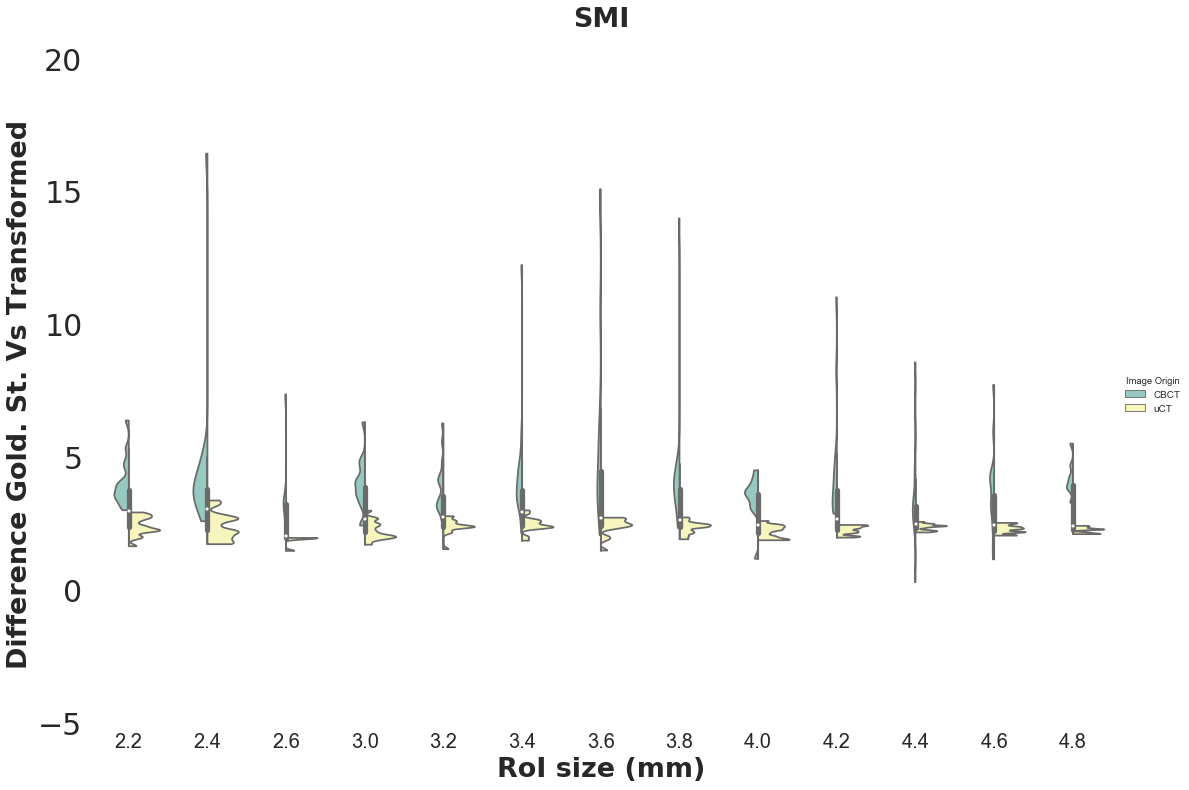

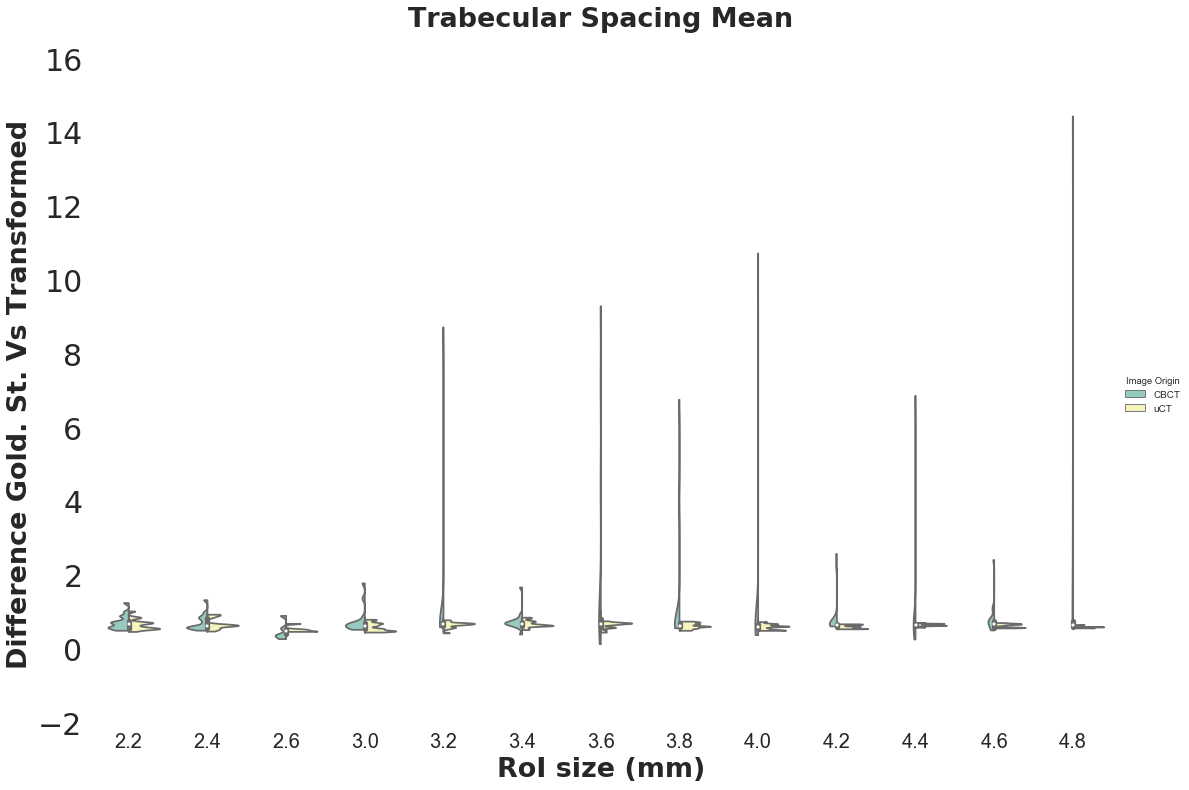

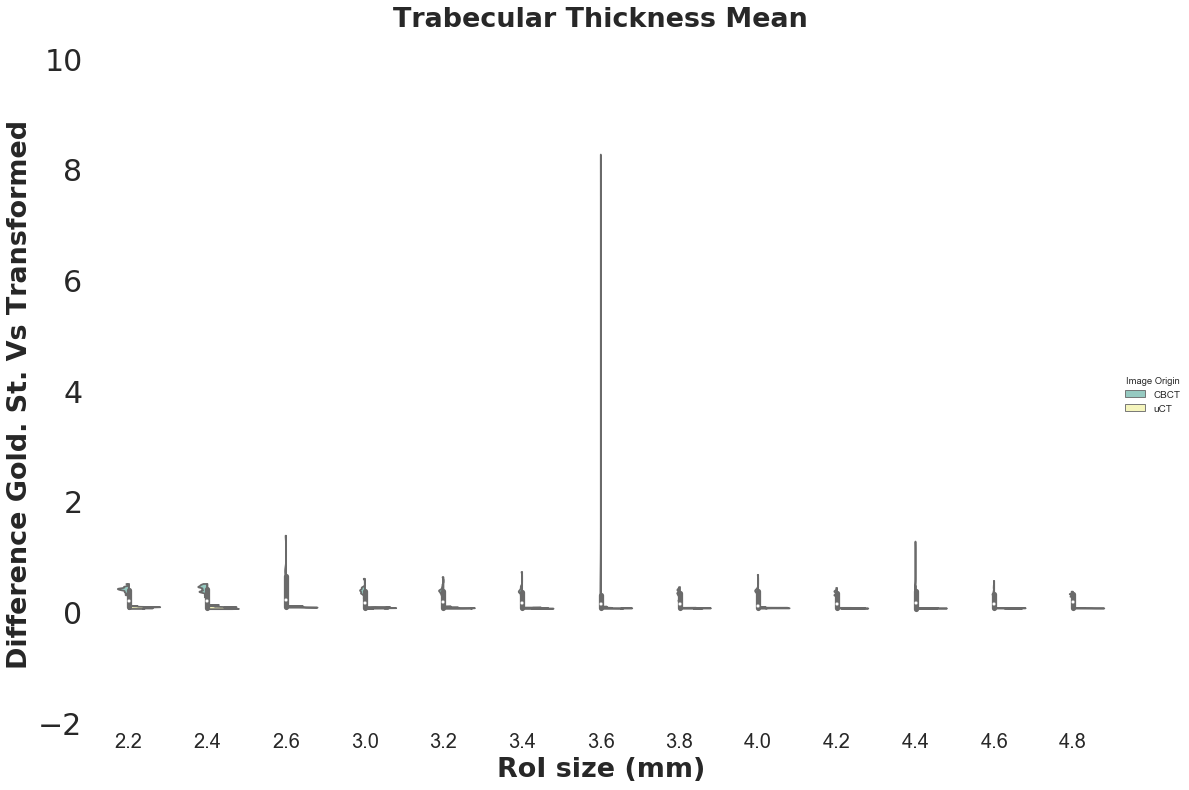

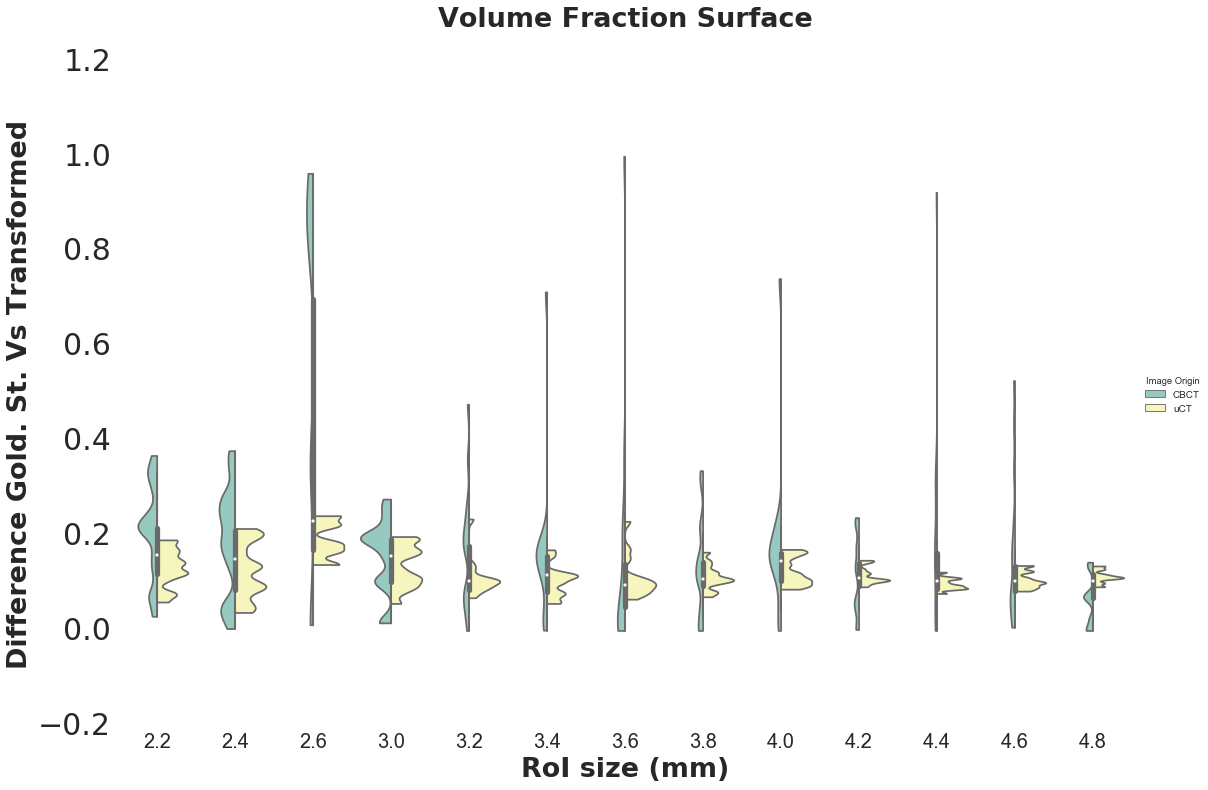

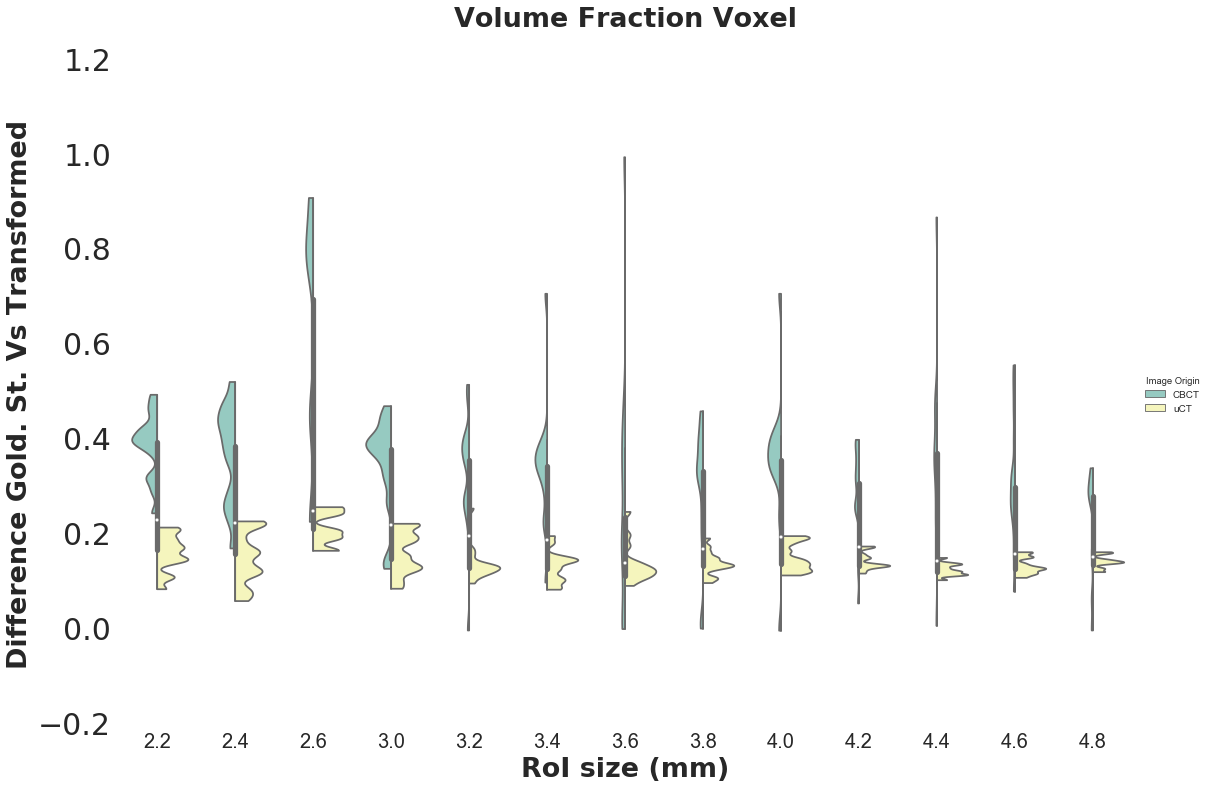

In [84]:
import seaborn as sns

sizeFont = 40
WidthBox = 0.2
color = 'black'
varNum = [10,11,12,44,55,58,63,64]#range(8,26,1) # Variables to show in the graph


for var in varNum:
    varName = datamatrix.columns.values[var]
    g = sns.factorplot(x="RoI Size", y=varName,
                    hue="Image Origin", size = 10, aspect=1.5,\
                    data=datamatrix[datamatrix[varName].notnull()],
                    orient="v", palette="Set3",
                    kind="violin", split=True, cut=0, bw=.2)


    g.ax.tick_params(axis='x', labelsize=20)
    g.ax.tick_params(axis='y', labelsize=30)
    g.ax.set_xlabel('RoI size (mm)', fontsize=27,fontweight="bold")
    g.ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
    g.ax.set_title(varName + '\n', fontsize=27,fontweight="bold")
    g.ax.set_axis_bgcolor('white')


    # Save results
    resultfile = pathToSavingFiles + '/uCTvsCBCTComparison/'+varName+'.png'
    plt.savefig(resultfile,bbox_inches='tight')
    
    
    

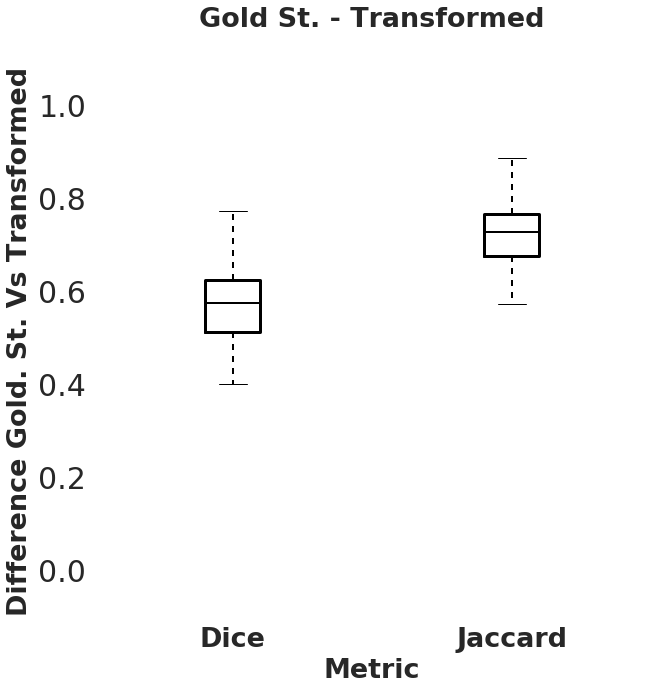

In [89]:
sizeFont = 40
WidthBox = 0.2
color = 'black'
plt.gcf().subplots_adjust(bottom=0.15)

f, ax = plt.subplots(1, sharex=True, figsize = (10,10))
varNames = datamatrix.columns.values[[13,37]]

for i, varName in enumerate(varNames):
    bp = ax.boxplot((datamatrix[datamatrix[varName].notnull()])[varName].values,\
                        positions = [i],\
                        widths = [WidthBox],)
    ax.set_xlim([-0.5,i+0.5])
    ax.set_ylim([-0.1,1.1])
    plt.setp(bp['boxes'], color=color, lw = 3)
    plt.setp(bp['whiskers'], color=color, lw = 2)
    plt.setp(bp['medians'], color = color, lw = 2)
    plt.setp(bp['fliers'], color=color, marker='+')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('Metric', fontsize=27,fontweight="bold")
    ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
    ax.set_xticks(range(len(varNames)))
    ax.set_xticklabels(varNames, fontsize=27, ha='center',fontweight="bold")
    ax.set_title('Gold St. - Transformed' + '\n', fontsize=27,fontweight="bold")
    ax.set_axis_bgcolor('white')


    
# Save results
resultfile = pathToSavingFiles + '/uCTvsCBCTComparison/Similarity.png'
plt.savefig(resultfile,bbox_inches='tight')
image = Image.open(resultfile)
if image.mode == 'RGBA':
    r,g,b,a = image.split()
    rgb_image = Image.merge('RGB', (r,g,b))

    inverted_image = PIL.ImageOps.invert(rgb_image)

    r2,g2,b2 = inverted_image.split()

    final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

    final_transparent_image.save(resultfile)

else:
    inverted_image = PIL.ImageOps.invert(image)
    inverted_image.save(resultfile)

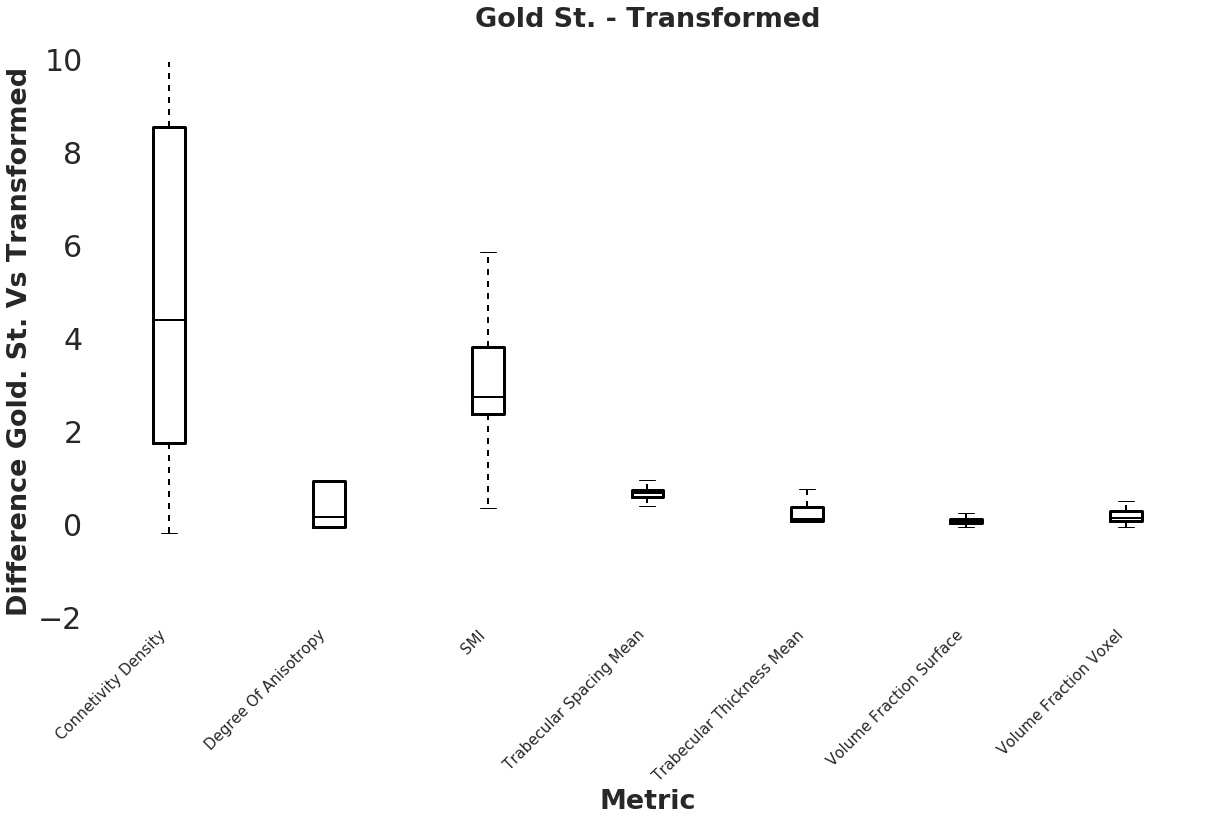

In [90]:
sizeFont = 40
WidthBox = 0.2
color = 'black'
plt.gcf().subplots_adjust(bottom=0.15)

f, ax = plt.subplots(1, sharex=True, figsize = (20,10))
varNames = datamatrix.columns.values[[11,12,44,55,58,63,64]]

for i, varName in enumerate(varNames):
    bp = ax.boxplot((datamatrix[datamatrix[varName].notnull()])[varName].values,\
                        positions = [i],\
                        widths = [WidthBox],)
    ax.set_xlim([-0.5,i+0.5])
    ax.set_ylim([-2,10])
    plt.setp(bp['boxes'], color=color, lw = 3)
    plt.setp(bp['whiskers'], color=color, lw = 2)
    plt.setp(bp['medians'], color = color, lw = 2)
    plt.setp(bp['fliers'], color=color, marker='+')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('Metric', fontsize=27,fontweight="bold")
    ax.set_ylabel('Difference Gold. St. Vs Transformed', fontsize=27,fontweight="bold")
    ax.set_xticks(range(len(varNames)))
    ax.set_xticklabels(varNames, fontsize=15, rotation=45, ha='right')
    ax.set_title('Gold St. - Transformed' + '\n', fontsize=27,fontweight="bold")
    ax.set_axis_bgcolor('white')


    
# Save results
resultfile = pathToSavingFiles + '/uCTvsCBCTComparison/AllTogetherDiff.png'
plt.savefig(resultfile,bbox_inches='tight')
image = Image.open(resultfile)
if image.mode == 'RGBA':
    r,g,b,a = image.split()
    rgb_image = Image.merge('RGB', (r,g,b))

    inverted_image = PIL.ImageOps.invert(rgb_image)

    r2,g2,b2 = inverted_image.split()

    final_transparent_image = Image.merge('RGBA', (r2,g2,b2,a))

    final_transparent_image.save(resultfile)

else:
    inverted_image = PIL.ImageOps.invert(image)
    inverted_image.save(resultfile)